In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run ctfidf.py

# TF-IDF
## Explore the most relevant terms

In [2]:
# Load the dataset
df = pd.read_csv('../data/travel_processed.csv')

In [3]:
def get_ctfidf(df, group, group_class, num_classes, top_terms):
    docs_per_pres = df.groupby([group], as_index=False).agg({'remarks': ' '.join})

    count_vectorizer = CountVectorizer().fit(docs_per_pres.remarks)
    count = count_vectorizer.transform(docs_per_pres.remarks)
    words = count_vectorizer.get_feature_names_out()

    ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(df)).toarray()  
    words_per_class = {docs_per_pres[group][label]: [[words[index], ctfidf[label][index]] for index in ctfidf[label].argsort()[-top_terms:]] for label in range(num_classes)}
    terms = pd.DataFrame({'term' : [x[0] for x in words_per_class[group_class]], 'score' : [x[1] for x in words_per_class[group_class]]}).sort_values(by='score', ascending=False)
    return terms

In [4]:
terms_pres = get_ctfidf(df, 'visit_type', 'president', 2, 20)
terms_sec = get_ctfidf(df, 'visit_type', 'secretary', 2, 20)

In [5]:
sns.set_theme(style='ticks', rc={"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, 'savefig.dpi':300}, font='Arial')

Text(0, 0.5, 'Term')

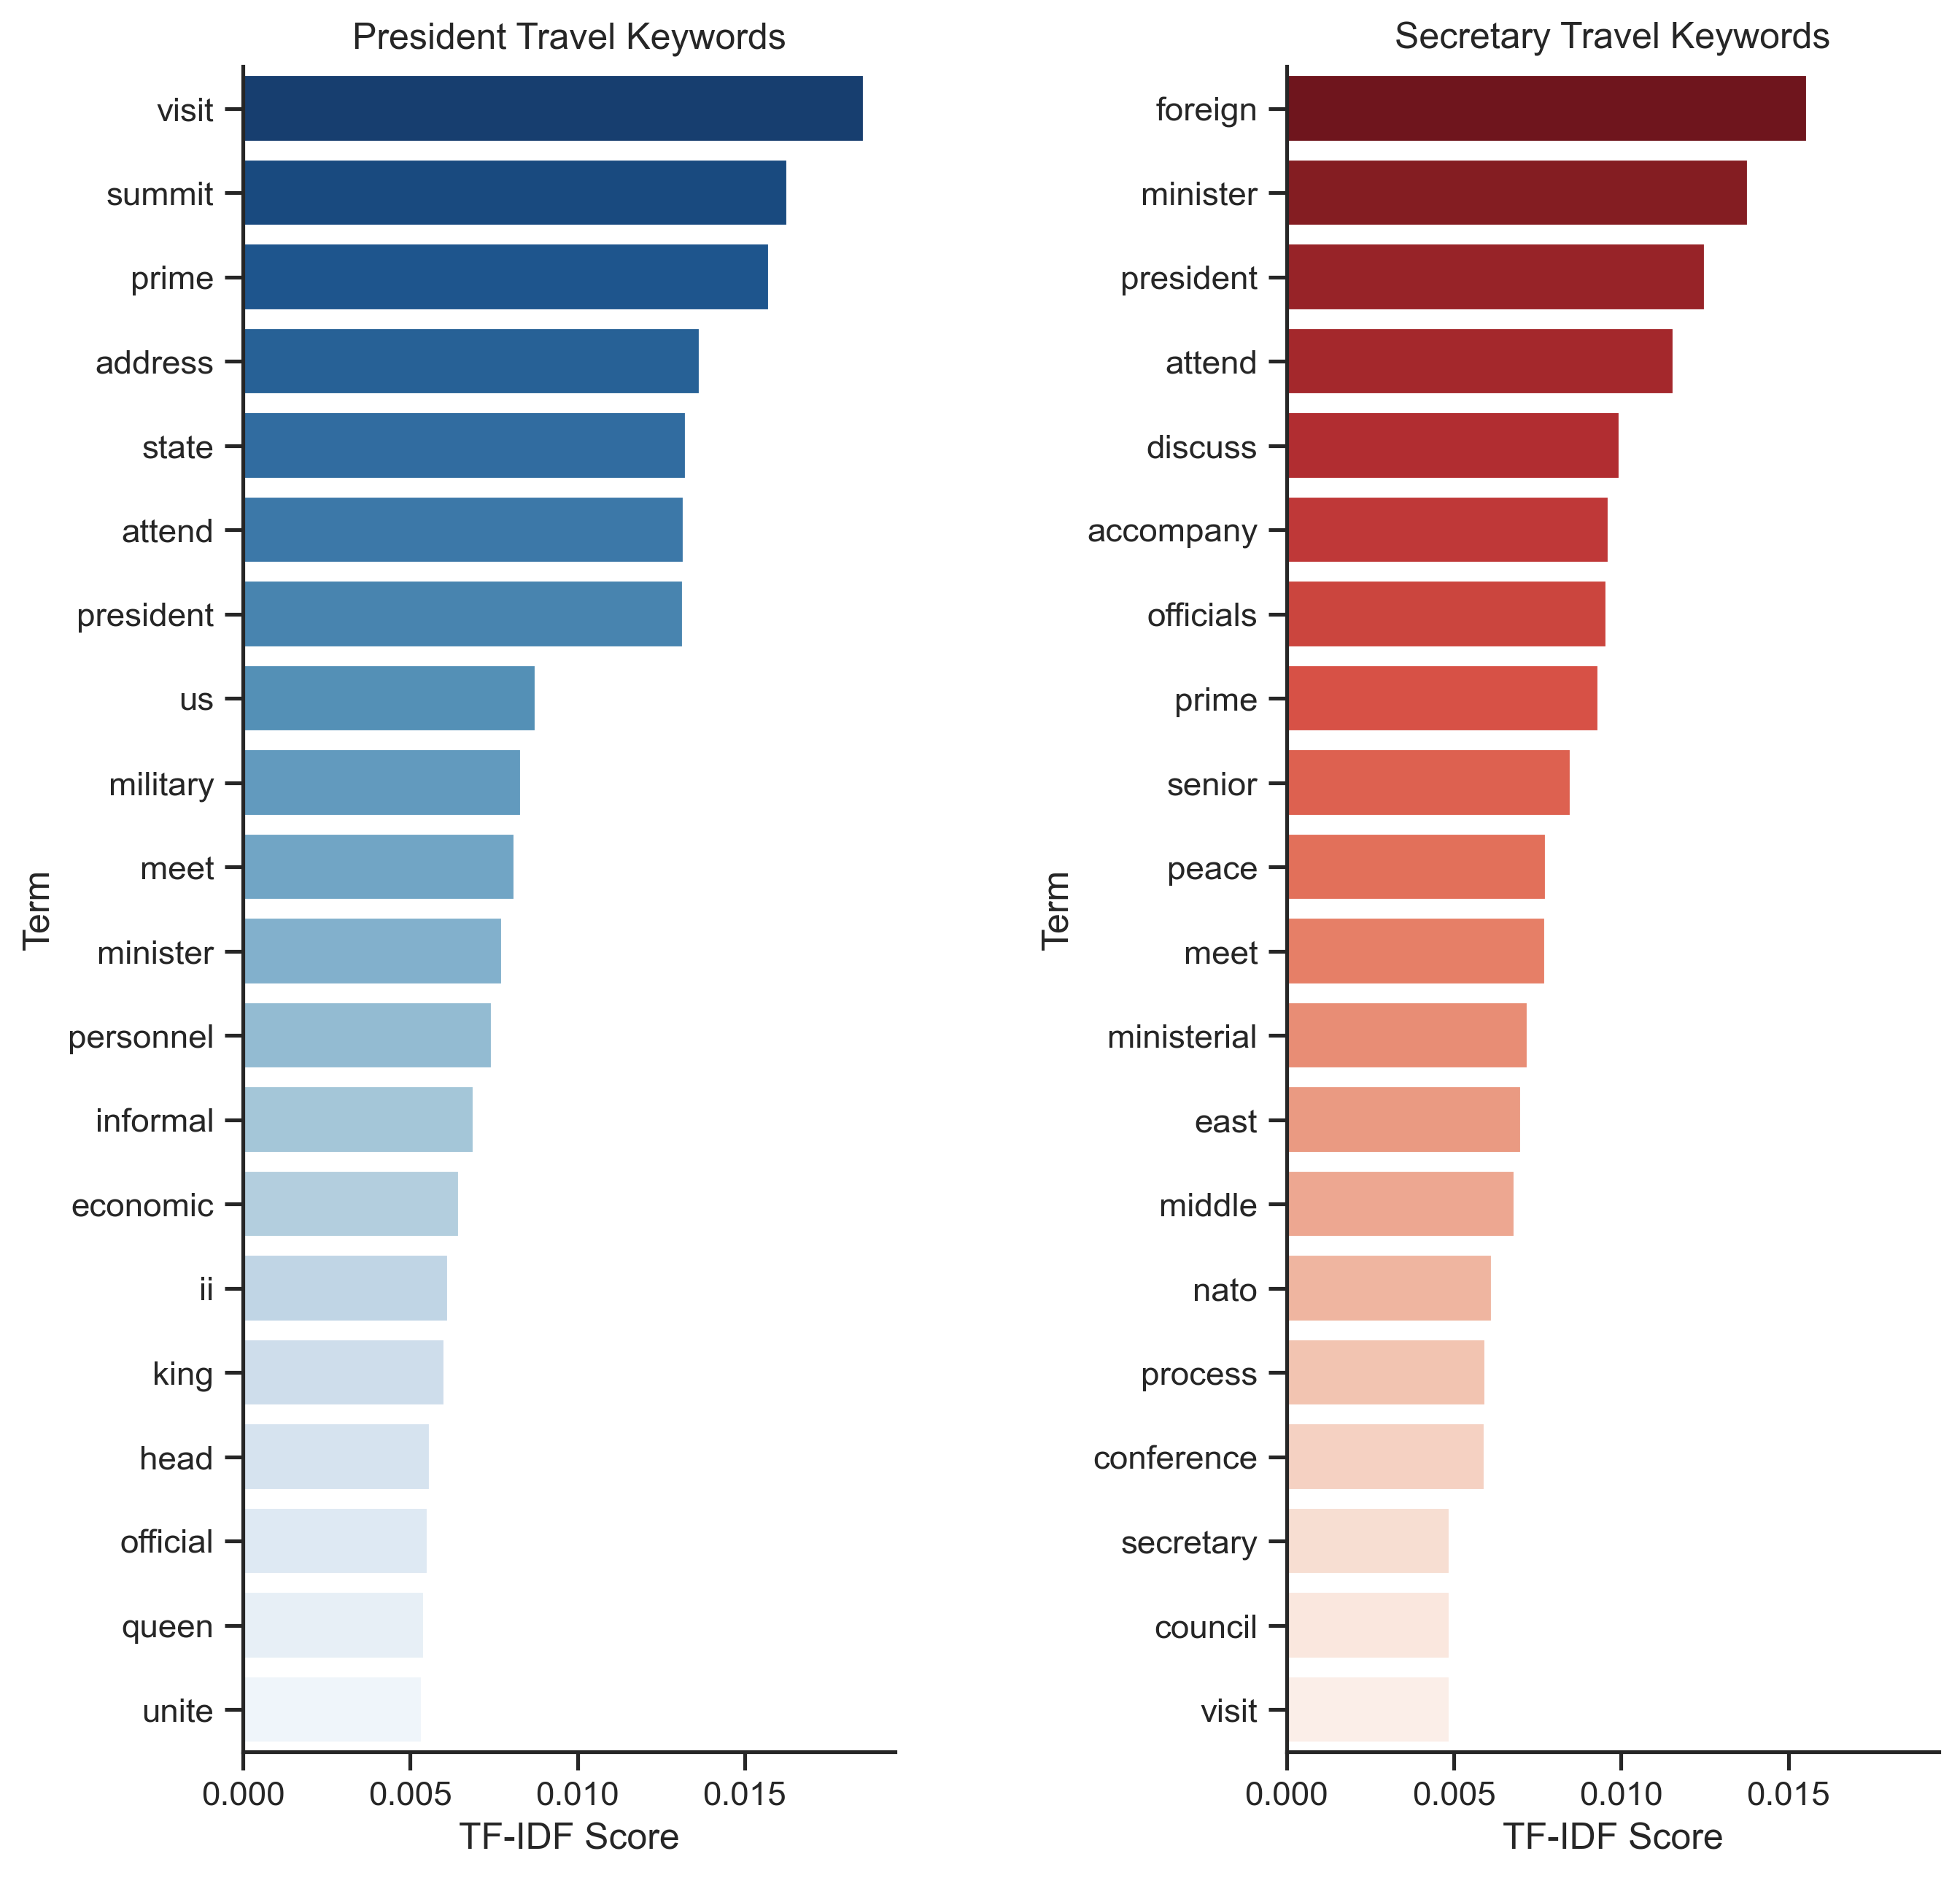

In [6]:
fig, ax = plt.subplots(1,2, sharex=True)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace=0.6)
sns.barplot(data=terms_pres, x='score', y='term', palette='Blues_r', ax=ax[0])
sns.barplot(data=terms_sec, x='score', y='term', palette='Reds_r', ax=ax[1])
ax[0].set_title('President Travel Keywords')
ax[0].set_xlabel('TF-IDF Score')
ax[0].set_ylabel('Term')
ax[1].set_title('Secretary Travel Keywords')
ax[1].set_xlabel('TF-IDF Score')
ax[1].set_ylabel('Term')

In [ ]:
df_tr = get_ctfidf(df, 'name', 'Donald J. Trump', len(df['name'].drop_duplicates()), 5)